# Linear Model Selection and Regularization

In the regression setting, the standard linear model

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2+...+ \beta_pX_p + \epsilon$$

is commonly used to describe the relationship between a response $Y$ and a set of variables $X_1$, $X_2$, ..., $X_p$. 
One typically fits this model using least squares.

There are approaches for extending the linear model framework to non linear models.
A simple linear model can be improved, by replacing plain least squares fitting with some alternative fitting procedures. 
Alternative fitting procedures can yield better prediction accuracy and model interpretability.

-----

<i>Prediction Accuracy:</i> 
Provided that the true relationship between the response and the predictors is approximately linear, the least squares estimates will have low bias. 
If $n>>p$ — that is, if $n$, the number of observations, is much larger than $p$, the number of variables — then the least squares estimates tend to also have low variance, and hence will perform well on test observations. 
However, if $n$ is not much larger than $p$, then there can be a lot of variability in the least squares fit,
resulting in overfitting and consequently poor predictions on future observations not used in model training. 
And if $p > n$, then there is no longer a unique least squares coefficient estimate: 
the variance is infinite so the method cannot be used at all. 

By constraining or shrinking the estimated coefficients, 
we can often substantially reduce the variance at the cost of a negligible increase in bias. 
This can lead to substantial improvements in the accuracy with which we can predict the response for observations not used in model training.

<i>Model Interpretability:</i> Irrelevant variables used in a multiple regression model leads to unnecessary complexity in the resulting model. 
By removing these variables—that is, by setting the corresponding coefficient estimates to zero we can obtain a model that is more easily interpreted.
There are few approaches for automatically performing feature selection or variable selection for excluding irrelevant variables from a multiple regression model.

----

* <i>Subset Selection:</i> This approach involves identifying a subset of the $p$ predictors that we believe to be related to the response. We then fit a model using least squares on the reduced set of variables.

* <i>Shrinkage: </i> This approach involves fitting a model involving all $p$ predictors. However, the estimated coefficients are shrunken towards zero relative to the least squares estimates. This shrinkage (also known as regularization) has the effect of reducing variance where some of the coefficients may be estimated to be exactly zero. Hence, shrinkage methods can also perform variable selection.

* <i>Dimension Reduction:</i> Dimension reduction involves projecting the $p$ predictors into a <i>M</i>-dimensional subspace, where $M < p$. This is achieved by computing $M$ different linear combinations, or projections, of the variables. Then these $M$ projections are used as predictors to fit a linear regression model by least squares.

### <span style="color:#4774bc">Subset Selection</span> 

We will look into methods for selecting subsets of predictors. To perform best subset selection, we fit a separate least squares regression for each possible combination of the p predictors. That is, we fit all p models that contain exactly one predictor, all ${p \choose 2} = p(p-1)/2$ models that contain exactly two predictors, and so forth. We then look at all of the resulting
models, with the goal of identifying the one that is best. 

-----
<span style="color:#4774bc">Algorithm 1: </span> <i>Best subset selection</i>

------

- Let $M_0$ denote the null model , which contains no predictors. This model simply predicts the sample mean for each observation.

- For $k$ = 1, 2, 3,...,$p$:
    * Fit all ${p \choose k}$ models that contain exactly $k$ predictors.
    
    * Pick the best among these ${p \choose k}$ models, and call it $M_k$. Here _best_ is defined as having the smallest RSS, or equivalently largest $R^2$.
    
- Select a single best model from among $M_0$, . . . ,$M_p$ using crossvalidated prediction error, $C_p$ (AIC), BIC, or adjusted $R^2$.
-----



In above algorithm, Step 2 identifies the best model (on the training data) for each subset size, in order to reduce the problem from one of $2^p$ possible models to one of $p + 1$ possible models. we must simply choose among these $p + 1$ options. This task must be performed with care, because the $RSS$ of these $p + 1$ models decreases monotonically, and the $R^2$ increases
monotonically, as the number of features included in the models increases. Therefore, if we use these statistics to select the best model, then we will always end up with a model involving all of the variables. The problem is that a low $RSS$ or a high $R^2$ indicates a model with a low training error, whereas we wish to choose a model that has a low test error. Therefore, in Step 3, we use cross-validated prediction error, $C_p$, $BIC$, or adjusted $R^2$ in order to select among $M_0$, $M_1$, . . . ,$M_p$.

Although best subset selection here is discussed for least squares regression, the same ideas apply to other types of models, such as logistic regression. In the case of logistic regression, instead of ordering models by $RSS$ in Step 2 of Algorithm 1, we instead use the deviance, a measure deviance that plays the role of $RSS$ for a broader class of models. The deviance is
negative two times the maximized log-likelihood; the smaller the deviance, the better the fit. While best subset selection is a simple and conceptually appealing approach, it suffers from computational limitations. The number of possible models that must be considered grows rapidly as $p$ increases.

### <span style="color:#4774bc">Stepwise Selection</span>

For computational reasons, best subset selection cannot be applied with very large p. Also when p is large, search space is larger too. The higher the chance of finding models that look good on the training data, even though they might not have any predictive power on future data.

#### <span style="color:#4774bc">Forward Stepwise Selection</span>

Forward stepwise selection is a computationally efficient alternative to best subset selection. While the best subset selection procedure considers all 2p possible models containing subsets of the p predictors, forward stepwise considers a much smaller set of models. Forward stepwise selection begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, until all of the predictors are in the model. In particular, at each step the variable that gives the greatest additional improvement to the fit is added to the model.

-----
<span style="color:#4774bc">Algorithm 2: </span> <i>Forward stepwise selection</i>

------

- Let $M_0$ denote the null model, which contains no predictors.
- For k=0, ..., p-1:
    * Consider all $p − k$ models that augment the predictors in $M_k$ with one additional predictor.
    * Choose the $best$ among these $p − k$ models, and call it $M_{k+1}$. Here $best$ is defined as having smallest $RSS$ or highest $R^2$. 
- Select a single best model from among $M_0$, . . . ,$M_p$ using crossvalidated prediction error, $C_p$ (AIC), BIC, or adjusted $R^2$.
----


Stepwise selection involves fitting one null model, along with $p − k$ models in the $kth$ iteration, for $k$ = 0, . . . , $p\  −\ 1$. This amounts to a total of 1 + $\sum_{k=0}^{p-1}(p-k) = 1+p(p+1)/2$ models. When p = 20, forward stepwise selection requires fitting only 211 models. 

Though forward stepwise tends to do well in practice, it is not guaranteed to find the best possible model out of all $2p$ models containing subsets of the $p$ predictors. For instance, suppose that in a given data set with $p = 3$ predictors, the best possible one-variable model contains $X_1$, and the best possible two-variable model instead contains $X_2$ and $X_3$. Then forward stepwise selection will fail to select the best possible two-variable model, because $M_1$ will contain $X_1$, so $M_2$ must also contain $X_1$ together with one additional variable.



#### <span style="color:#4774bc">Backward Stepwise Selection</span>

Like forward stepwise selection, backward stepwise selection provides an efficient alternative to best subset selection. However, unlike forward stepwise selection, it begins with the full least squares model containing all p predictors, and then iteratively removes the least useful predictor, one-at-a-time.

Like forward stepwise selection, the backward selection approach searches through only $1+p(p+1)/2$ models, and so can be applied in settings where $p$ is too large to apply best subset selection. Also like forward stepwise selection, backward stepwise selection is not guaranteed to yield the best model containing a subset of the $p$ predictors.

Backward selection requires that the number of samples $n$ is larger than the number of variables $p$ (so that the full model can be fit). In contrast, forward stepwise can be used even when $n < p$, and so is the only viable subset method when $p$ is very large.

-----

We will apply the best subset selection approach to the Hitters data. We wish to predict a baseball player’s Salary on the basis of various statistics associated with performance in the previous year. Salary variable is missing for some of the players. Use the is.na() function to identify the missing observations as it returns a vector of the same length as the input vector, with a TRUE for any elements that are missing, and a FALSE for non-missing elements. The sum() function can then be used to count all of the missing elements. 

In [1]:
library(ISLR)
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [2]:
dim(Hitters)

[1] 322  20

In [3]:
sum(is.na(Hitters$Salary))

[1] 59

Hence we see that Salary is missing for 59 players. The na.omit() function removes all of the rows that have missing values in any variable.

In [4]:
Hitters = na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [5]:
sum(is.na(Hitters))

[1] 0

The <span style="color:#a5541a">regsubsets()</span> function (part of the <span style="color:#a5541a">leaps</span> library) performs best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS. The syntax is the same as for <span style="color:#a5541a">lm()</span>. The <span style="color:#a5541a">summary()</span> command outputs the best set of variables for each model size.

In [6]:
library(leaps)
regfit.full = regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

An asterisk indicates that a given variable is included in the corresponding model. For instance, this output indicates that the best two-variable model contains only <span style="color:#a5541a">Hits</span> and <span style="color:#a5541a">CRBI</span>. By default, <span style="color:#a5541a">regsubsets()</span> only reports results up to the best eight-variable model. But the <span style="color:#a5541a">nvmax</span> option can be used in order to return as many variables as are desired. Here we fit up to a 19-variable model.

In [7]:
regfit.full = regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary = summary(regfit.full)

The <span style="color:#a5541a">summary()</span> function also returns $R^2$, $RSS$, adjusted $R^2$, $C_p$, and $BIC$. We can examine these to try to select the best overall model.

In [8]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

For instance, we see that the $R^2$ statistic increases from 32%, when only one variable is included in the model, to almost 55%, when all variables are included. As expected, the $R^2$ statistic increases monotonically as more variables are included.

In [9]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

Plotting $RSS$, adjusted $R^2$, $C_p$, and $BIC$ for all of the models at once will help us decide which model to select. Note the <span style="color:#a5541a">type="l"</span> option tells R to connect the plotted points with lines.

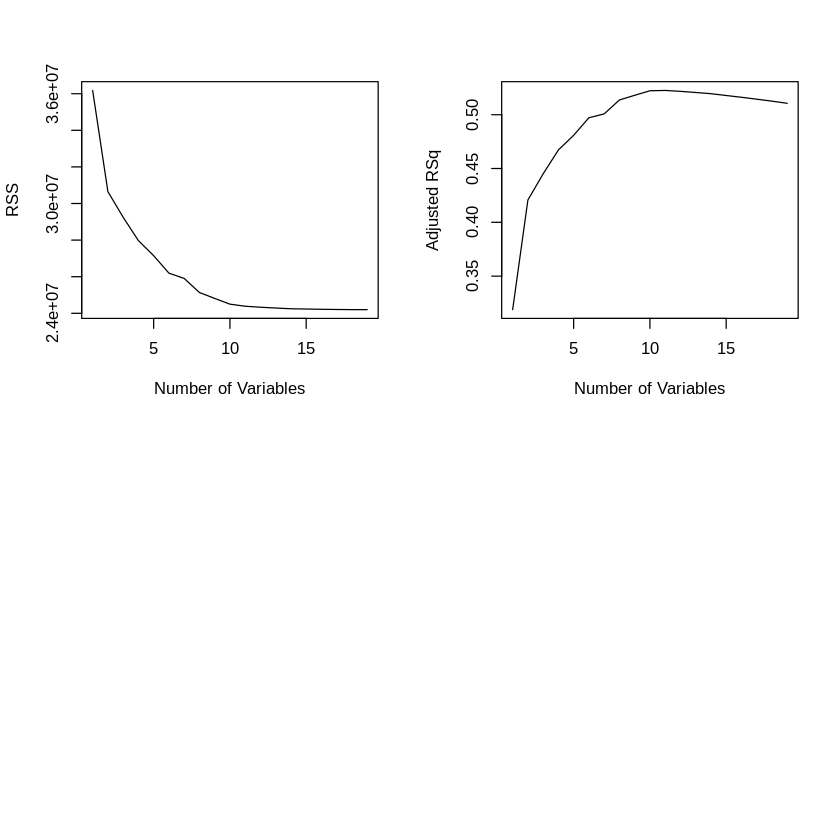

In [10]:
par(mfrow = c(2,2))
plot(reg.summary$rss, xlab="Number of Variables", ylab="RSS", type="l")
plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")

The <span style="color:#a5541a">points()</span> command works like the <span style="color:#a5541a">plot()</span> command, except that it puts points on a plot that has already been created, instead of creating a new plot. The <span style="color:#a5541a">which.max()</span> function can be used to identify the location of the maximum point of a vector. We will now plot a red dot to indicate the model with the largest adjusted $R^2$ statistic.

In [11]:
which.max(reg.summary$adjr2)

[1] 11

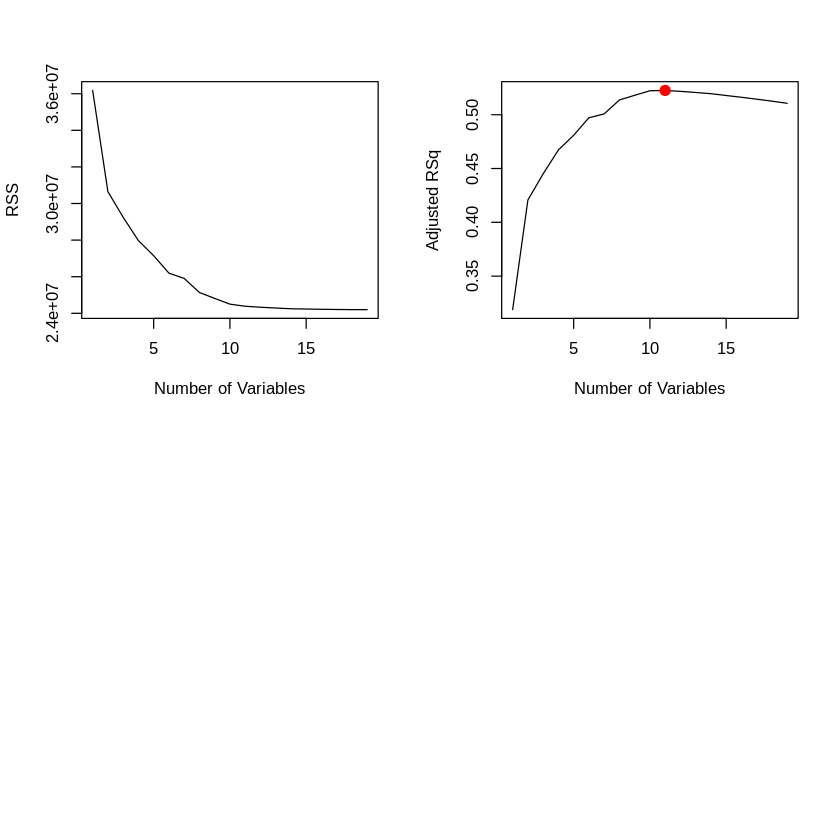

In [12]:
par(mfrow = c(2,2))
plot(reg.summary$rss, xlab="Number of Variables", ylab="RSS", type="l")
plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
points(11, reg.summary$adjr2[11], col="red", cex=2, pch=20)

In a similar fashion we can plot the $C_p$ and $BIC$ statistics, and indicate the models with the smallest statistic using <span style="color:#a5541a">which.min()</span>.

In [13]:
which.min(reg.summary$cp)

[1] 10

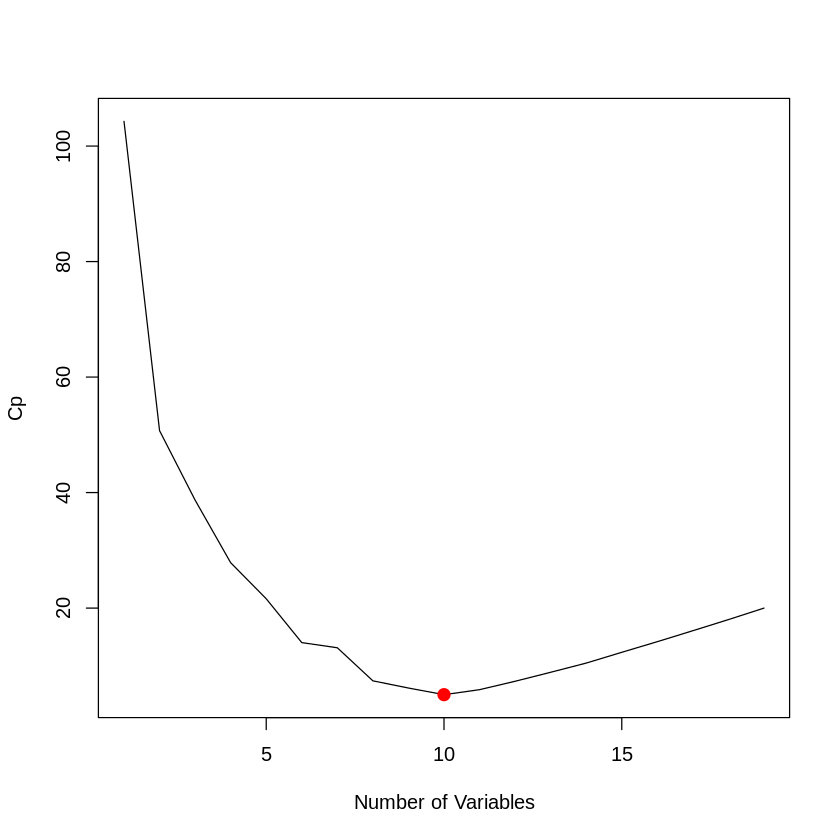

In [14]:
plot(reg.summary$cp, xlab ="Number of Variables", ylab="Cp", type='l')
points(10, reg.summary$cp[10], col="red", cex =2, pch=20)

In [15]:
which.min(reg.summary$bic)

[1] 6

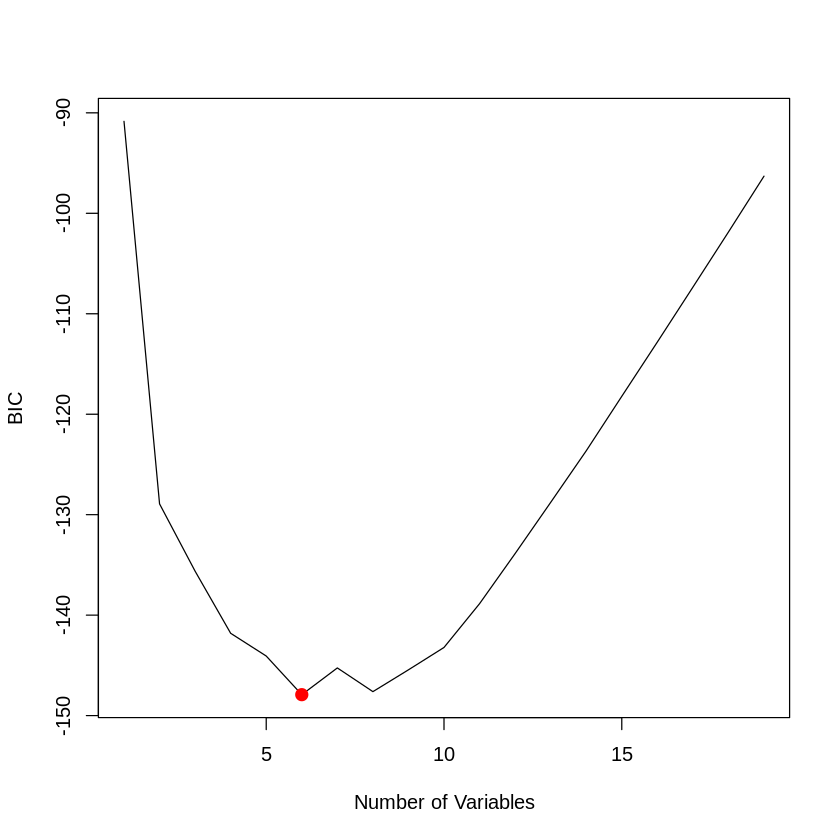

In [16]:
plot(reg.summary$bic, xlab="Number of Variables", ylab="BIC", type='l')
points(6, reg.summary$bic[6], col="red", cex=2, pch=20)

The <span style="color:#a5541a">regsubsets()</span> function has a built-in <span style="color:#a5541a">plot()</span> command which can be used to display the selected variables for the best model with a given number of predictors, ranked according to the BIC, $C_p$, adjusted $R^2$, or AIC. To find out more about this function, type <span style="color:#a5541a">?plot.regsubsets</span>.

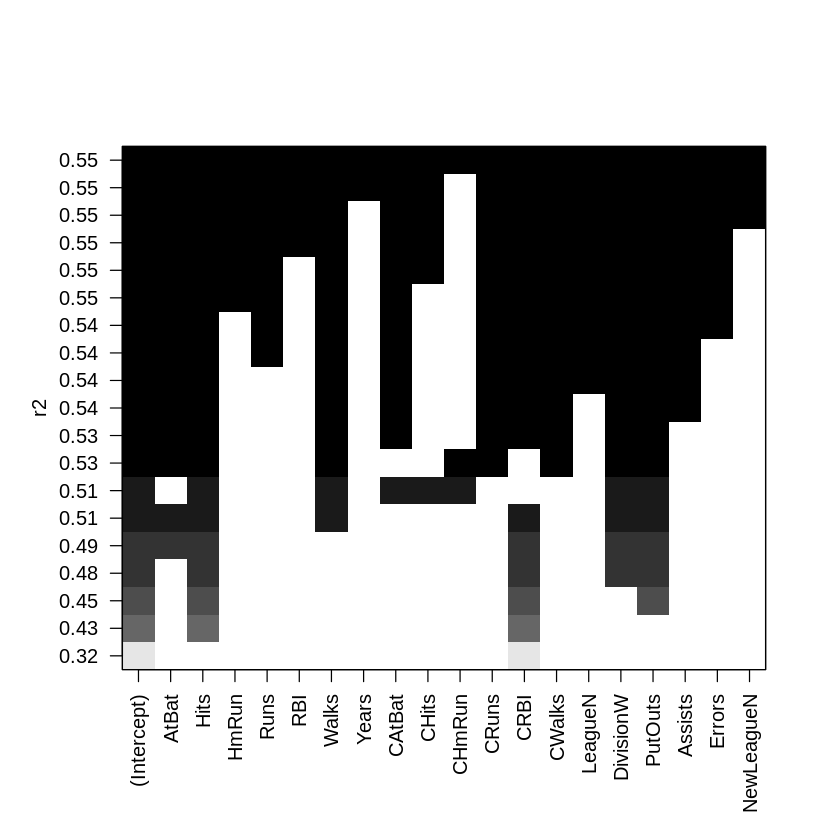

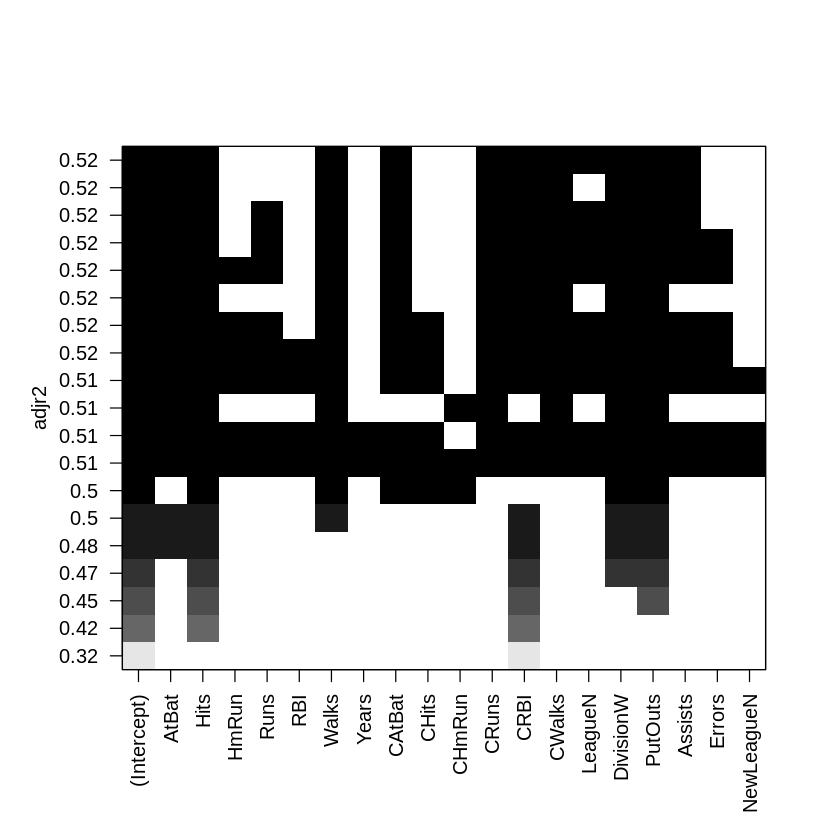

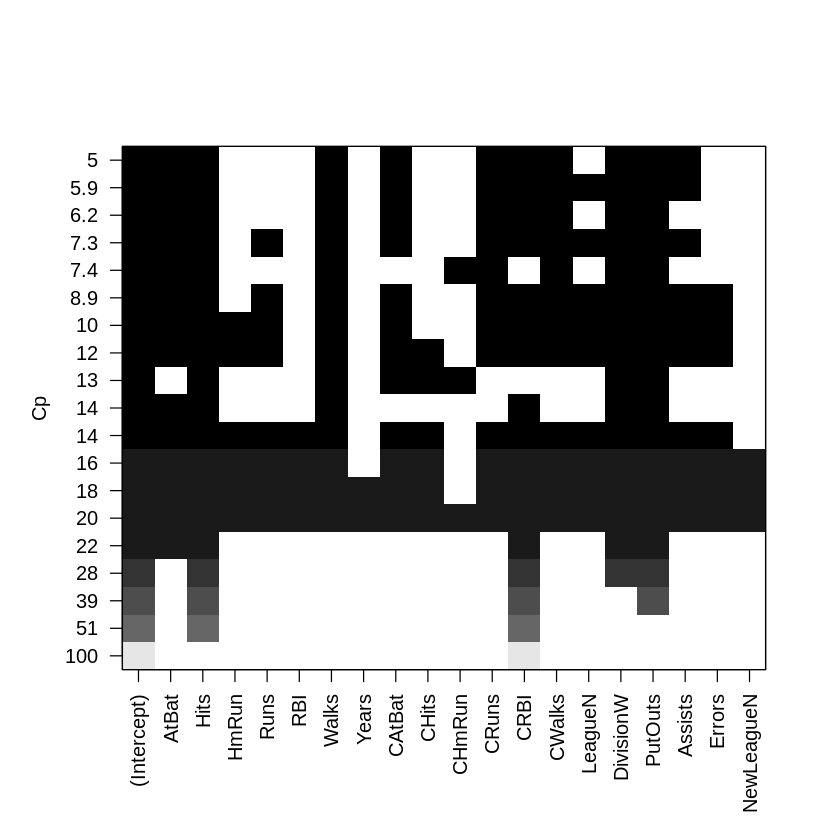

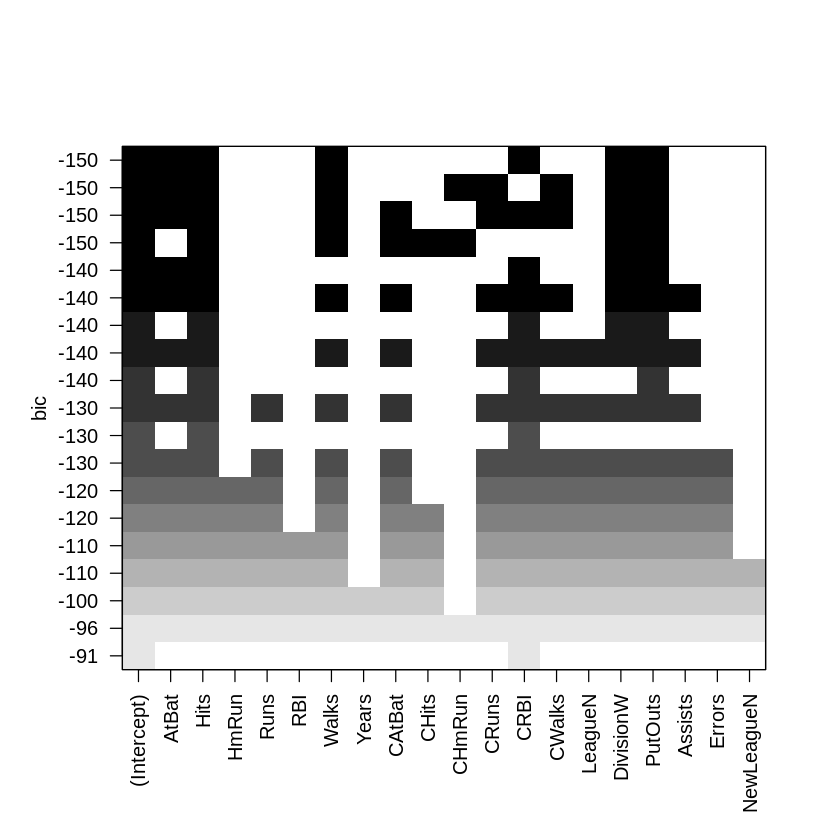

In [17]:
plot(regfit.full, scale = "r2")
plot(regfit.full, scale = "adjr2")
plot(regfit.full, scale = "Cp")
plot(regfit.full, scale = "bic")

The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. For instance, we see that several models share a BIC close to −150. However, the model with the lowest BIC is the six-variable model that contains only <span style="color:#a5541a">AtBat</span>, <span style="color:#a5541a">Hits</span>, <span style="color:#a5541a">Walks</span>, <span style="color:#a5541a">CRBI</span>, <span style="color:#a5541a">DivisionW</span>, and <span style="color:#a5541a">PutOuts</span>. We can use the <span style="color:#a5541a">coef()</span> function to see the coefficient estimates associated with this model.

In [18]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

<span style="color:#4774bc">Forward and Backward Stepwise Selection</span>

We can also use the <span style="color:#a5541a">regsubsets()</span> function to perform forward stepwise or backward stepwise selection, using the argument <span style="color:#a5541a">method="forward"</span> or <span style="color:#a5541a">method="backward"</span>.

In [19]:
regfit.fwd=regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [20]:
regfit.bwd=regsubsets(Salary~., data=Hitters, nvmax=19, method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


For instance, we see that using forward stepwise selection, the best onevariable model contains only <span style="color:#a5541a">CRBI</span>, and the best two-variable model additionally includes <span style="color:#a5541a">Hits</span>. For this data, the best one-variable through six variable models are each identical for best subset and forward selection. However, the best seven-variable models identified by forward stepwise selection,
backward stepwise selection, and best subset selection are different

In [21]:
coef(regfit.full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [22]:
coef(regfit.fwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [23]:
coef(regfit.bwd, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

### <span style="color:#4774bc">Choosing the Optimal Model </span>

Best subset selection, forward selection, and backward selection result in the creation of a set of models, each of which contains a subset of the $p$ predictors. We need a way to determine which of these models is best. As discussed before, the model containing all of the predictors will always have the smallest $RSS$ and the largest $R^2$, since these quantities are related to the training error. Instead, we wish to choose a model with a low test error. 

The training error can be a poor estimate of the test error. Therefore, $RSS$ and $R^2$ are not suitable for selecting the best model among a collection of models with different numbers of predictors. In order to select the best model with respect to test error, we need to estimate this test error.

#### <span style="color:#4774bc"> $C_p$, AIC, BIC, and Adjusted $R^2$ </span>


The training set $MSE$ is generally an underestimate of the test $MSE$. (Recall that $MSE = RSS/n$.) This is because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training $RSS$ (but not the test $RSS$) is as small as possible. In particular, the training error will decrease as more variables are included in the model, but the test error may not. Therefore, training set $RSS$ and training set $R^2$ cannot be used to select from among a set of models with different numbers of variables.

A number of techniques for adjusting the training error for the model size are available. These approaches can be used to select among a set of models with different numbers of variables. We will discuss four such approaches: $C_p$, <i>Akaike information criterion (AIC)</i>, <i>Bayesian information criterion (BIC)</i>, and <i>adjusted $R^2$</i>.

-----

<span style="color:#4774bc"> $C_p$:</span> For a fitted least squares model containing d predictors, the $C_p$ estimate of test $MSE$ is computed using the equation

$$ C_p = \frac{1}{n}(RSS+2d\hat{\sigma}^2) \quad\quad\quad - \quad(1) $$

where $\hat{\sigma}^2$ is an estimate of the variance of the error $\epsilon$ associated with each response measurement in (1). Essentially, the $C_p$ statistic adds a penalty of $2d\hat{\sigma}^2$ to the training $RSS$ in order to adjust for the fact that the training error tends to underestimate the test error. Clearly, the penalty increases as the number of predictors in the model increases. This is intended to adjust for the corresponding decrease in training RSS.


**$C_p$:** Mallow's $C_p$ is sometimes defined as ${C'}_p$ = RSS/$\hat{\sigma}^2 + 2d − n$. This is equivalent to the definition given above in the sense that $C_p$ = $\hat{\sigma}^2(C_p + n)$, and so the model with smallest $C_p$ also has smallest ${C'}_p$

-----


<span style="color:#4774bc"> $AIC$:</span> The AIC criterion is defined for a large class of models fit by maximum likelihood. In the case of the model (1) with Gaussian errors, maximum likelihood and least squares are the same thing. In this case AIC is given by 

$$ AIC = \frac{1}{n\hat{\sigma}^2}(RSS+2d\hat{\sigma}^2) $$

Hence for least squares models, $C_p$ and $AIC$ are proportional to each other

----

<span style="color:#4774bc"> $BIC$:</span> BIC is derived from a Bayesian point of view, but ends up looking similar to $C_p$ (and $AIC$) as well. For the least squares model with d predictors, the $BIC$ is, up to irrelevant constants, given by

$$BIC = \frac{1}{n} (RSS+log(n)d\hat{\sigma}^2)$$

Like $C_p$, the $BIC$ will tend to take on a small value for a model with a low test error, and so generally we select the model that has the lowest $BIC$ value. Notice that $BIC$ replaces the $2d\hat{\sigma}^2$ used by $C_p$ with a log(n)d$\hat{\sigma}^2$
term, where $n$ is the number of observations. Since $logn > 2$ for any $n > 7$, the $BIC$ statistic generally places a heavier penalty on models with many variables, and hence results in the selection of smaller models than $C_p$.


----


<span style="color:#4774bc">Adjusted $R^2: $</span> The adjusted R2 statistic is another popular approach for selecting among
a set of models that contain different numbers of variables. The usual $R^2$ is defined as 1 − RSS/TSS, where TSS = $\sum{(y_i − \bar{y})}^2$ is the total sum of squares for the response. Since $RSS$ always decreases as more variables are added to the model, the $R^2$ always increases as more variables are added. For a least squares model with d variables, the adjusted $R^2$ statistic is calculated as

$$Adjusted\ R^2 = 1-\frac{RSS/(n-d-1)}{TSS/(n-1)}$$

Unlike $C_p$, $AIC$, and $BIC$, for which a small value indicates a model with a low test error, a large value of adjusted $R^2$ indicates a model with a small test error. Maximizing the adjusted $R^2$ is equivalent to minimizing $\frac{RSS}{n-d-1}$. While RSS always decreases as the number of variables in the model increases, $\frac{RSS}{n-d-1}$ may increase or decrease, due to the presence of d in the denominator. 

The intuition behind the adjusted $R^2$ is that once all of the correct variables have been included in the model, adding additional noise variables will lead to only a very small decrease in RSS. Since adding noise variables leads to an increase in d, such variables will lead to an increase in $\frac{RSS}{n-d-1}$ and consequently a decrease in the adjusted R2. Therefore, in theory, the model with the largest adjusted $R^2$ will have only correct variables and no noise variables.

<span style="color:#4774bc">Choosing Among Models Using the Validation Set Approach and Cross-Validation</span>

We have seen that it is possible to choose among a set of models of different sizes using $C_p$, BIC, and adjusted $R^2$. We will now consider how to do this using the validation set and cross-validation approaches.

In order for these approaches to yield accurate estimates of the test error, we must use only the training observations to perform all aspects of model-fitting including variable selection. We begin by splitting the observations into a training set and a test set. We do this by creating a random vector, <span style="color:#a5541a">train</span>, of elements equal to <span style="color:#a5541a">TRUE</span> if the corresponding observation is in the training set, and <span style="color:#a5541a">FALSE</span> otherwise. The vector test has a <span style="color:#a5541a">TRUE</span> if the observation is in the test set, and a <span style="color:#a5541a">FALSE</span> otherwise.

In [24]:
set.seed(1)
train=sample(c(TRUE, FALSE), nrow(Hitters), rep=TRUE)
test=(!train)

Now, we apply <span style="color:#a5541a">regsubsets()</span> to the training set in order to perform best subset selection.

In [25]:
regfit.best=regsubsets(Salary~., data=Hitters[train,], nvmax =19)

Notice that we subset the <span style="color:#a5541a">Hitters</span> data frame directly in the call in order to access only the training subset of the data, using the expression <span style="color:#a5541a">Hitters[train,]</span>. We now compute the validation set error for the best model of each model size. We first make a model matrix from the test data.

In [26]:
test.mat=model.matrix(Salary~.,data=Hitters[test,])

The <span style="color:#a5541a">model.matrix()</span> function is used in many regression packages for building an "X" matrix from data. Now we run a loop, and for each size <span style="color:#a5541a">i</span>, we extract the coefficients from <span style="color:#a5541a">regfit.best</span> for the best model of that size, multiply them into the appropriate columns of the test model matrix to form the predictions, and compute the test MSE.

In [27]:
val.errors=rep(NA, 19)
for(i in 1:19)
{
    coefi=coef(regfit.best, id=i)
    pred=test.mat[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

We find that the best model is the one that contains ten variables.

In [28]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [29]:
which.min(val.errors)

[1] 7

In [30]:
coef(regfit.best, 10)

(Intercept)        AtBat         Hits        HmRun        Walks       CAtBat 
  71.8074075   -1.5038124    5.9130470  -11.5241809    8.4349759   -0.1654850 
       CRuns         CRBI       CWalks    DivisionW      PutOuts 
   1.7064330    0.7903694   -0.9107515 -109.5616997    0.2426078

This was a little tedious, partly because there is no <span style="color:#a5541a">predict()</span> method for <span style="color:#a5541a">regsubsets()</span>. Since we will be using this function again, we can capture our steps above and write our own predict method.

In [31]:
predict.regsubsets=function(object, newdata, id,...)
{
    form=as.formula(object$call[[2]])
    mat=model.matrix(form, newdata)
    coefi=coef(object, id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

Our function pretty much mimics what we did above. The only complex part is how we extracted the formula used in the call to regsubsets(). We demonstrate how we use this function below, when we do cross-validation. 

Finally, we perform best subset selection on the full data set, and select the best ten-variable model. It is important that we make use of the full data set in order to obtain more accurate coefficient estimates. Note that we perform best subset selection on the full data set and select the best ten variable model, rather than simply using the variables that were obtained from the training set, because the best ten-variable model on the full data set may differ from the corresponding model on the training set.

In [32]:
regfit.best=regsubsets(Salary~., data=Hitters, nvmax=19)
coef(regfit.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

In fact, we see that the best ten-variable model on the full data set has a different set of variables than the best ten-variable model on the training set.

We now try to choose among the models of different sizes using crossvalidation. This approach is somewhat involved, as we must perform best subset selection within each of the k training sets. Despite this, we see that with its clever subsetting syntax, R makes this job quite easy. First, we create a vector that allocates each observation to one of k = 10 folds, and we create a matrix in which we will store the results.

In [33]:
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters), replace=TRUE)
cv.errors=matrix(NA, k, 19, dimnames=list(NULL, paste(1:19)))

Now we write a for loop that performs cross-validation. In the jth fold, the elements of <span style="color:#a5541a">folds</span> that equal j are in the test set, and the remainder are in the training set. We make our predictions for each model size (using our new <span style="color:#a5541a">predict()</span> method), compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix cv.errors.

In [34]:
for(j in 1:k)
{
    best.fit=regsubsets(Salary~., data=Hitters[folds!=j,], nvmax=19)
    for(i in 1:19)
    {
        pred=predict(best.fit, Hitters[folds==j,], id=i)
        cv.errors[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

This has given us a 10×19 matrix, of which the (i, j)th element corresponds to the test MSE for the ith cross-validation fold for the best j-variable model. We use the <span style="color:#a5541a">apply()</span> function to average over the columns of this matrix in order to obtain a vector for which the jth element is the crossvalidation error for the j-variable model.

In [35]:
mean.cv.errors=apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

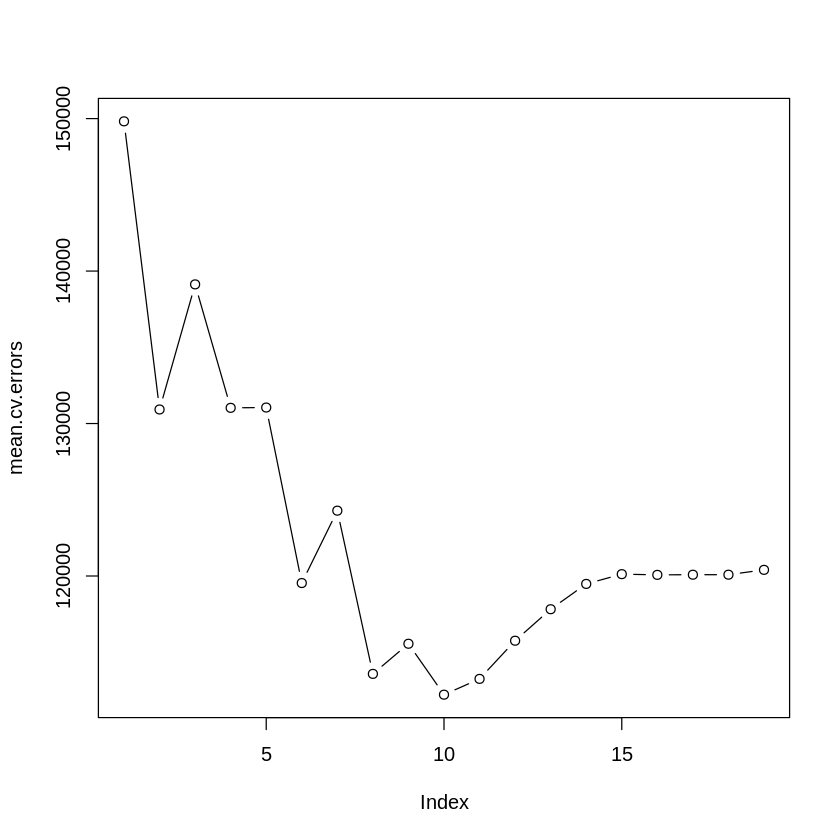

In [36]:
par(mfrow=c(1,1))
plot(mean.cv.errors, type='b')

We see that cross-validation selects an 11-variable model. We now perform best subset selection on the full data set in order to obtain the 11-variable model.

In [37]:
reg.best=regsubsets(Salary~., data=Hitters, nvmax=19)
coef(reg.best, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277